#### This notebook should be used for own investigations around the Dirac equation e.g. in the context of chapter 3.1 of the book.

In [1]:
from sympy import *

The module heppackv0.py should be available in the main notebook directory. It contains Pauli- and Dirac Matrizes, spinors like $u(p,s)$, currents like $\bar{u}\gamma^\mu u$ etc.

In [2]:
import heppackv0 as hep

Reading heppackv0.py (March 2023)

Done


In [3]:
theta,phi=symbols('theta phi',real=True)
E,M,m,p,r=symbols('E M m p r',positive=True)

Particles are characterized by an array containing their energy, mass, polar and azimuthal angle: $[E,m,\theta,\phi]$. 
We use pe= particle in xz plane, peneg=-pe, pez= particle along z xis, pexyz = general particle, pe0=particle at rest. 

In [4]:
pe=[E,m,theta,0]

In [5]:
peneg=[E,m,pi-theta,pi]

In [6]:
pez=[E,m,0,0]

In [7]:
pexyz=[E,m,theta,phi]

In [8]:
pe0=[m,m,0,0]

These arrays can be converted into four vectors $[E,p_x,p_y,p_z]$. To make calculations easier, momenta are expressed as function of $\theta/2$.

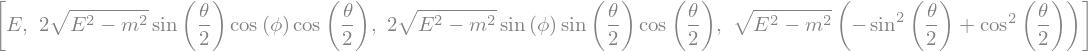

In [9]:
pe4xyz=hep.fourvec(pexyz);pe4xyz

## 1) helicity spinors

All calculations of the book are performed using spinors of defined positive or negative helicity, e.g. $u(pe,1)$ is a particle spinor with momentum $pe$ and positive helicity ($\lambda=1/2$), $v(pe,-1)$ an antiparticle spinor with negative helicity ($\lambda=-1/2$).

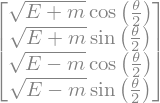

In [10]:
hep.u(pe,1)

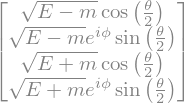

In [11]:
hep.v(pexyz,-1)

In [12]:
hep.vbar(pe,1)

Check the normalization (not Bjorken Drell)

In [13]:
norm=hep.ubar(pe,1)*hep.u(pe,1);norm

In [14]:
simplify(norm)

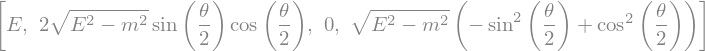

In [15]:
pe4=hep.fourvec(pe);pe4

## 2) Spin Matrices and more
heppackv0.py provides explicit expressions for $\gamma^\mu$ and $\gamma_5=\gamma^5$:

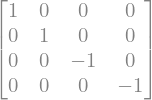

In [16]:
hep.g0

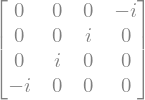

In [17]:
hep.g2

conjugate,transpose:


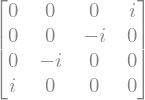

In [18]:
print('conjugate,transpose:')
hep.g2.C.T

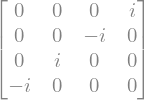

In [19]:
hep.g2*hep.g0

Algebraic relations like (3.8) can be easily checked explicitly

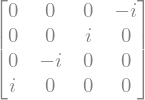

In [20]:
hep.g0*hep.g2

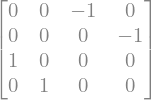

In [21]:
hep.g5*hep.g0

or mathematically

In [22]:
hep.g2*hep.g0+hep.g0*hep.g2==0*hep.Eins

True

The famous antisymmetric tensor $\sigma^{\mu\nu}=\frac{\mathrm i}{2}(\gamma^\mu\gamma^\nu-\gamma^\nu\gamma^\mu)$ is easily calculated. For the spacelike components $i,j=1..3$ there are 3 nonvanishing elements $\sigma^{ij}$.

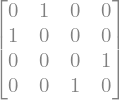

In [23]:
S1=I/2*(hep.g2*hep.g3-hep.g3*hep.g2);S1

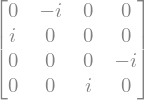

In [24]:
S2=I/2*(hep.g3*hep.g1-hep.g1*hep.g3);S2

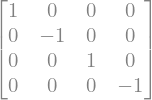

In [25]:
S3=I/2*(hep.g1*hep.g2-hep.g2*hep.g1);S3

The $S_i$ form a fourdimensional representation of the Pauli matrices. Proof:

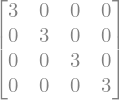

In [26]:
S1*S1+S2*S2+S3*S3

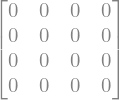

In [27]:
I/2*(S1*S3-S3*S1)-S2

$S_3/2=\frac{\mathrm i}{4}(\gamma^1\gamma^2-\gamma^2\gamma^1)$ may serve as the spin operator for solutions of the Dirac equation in the rest system. There are four solutions (see eq. 3.10), the normalization factor $N_S=\sqrt{2m}$ is already included. 

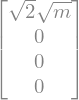

In [28]:
w1=sqrt(2*m)*Matrix([[1],[0],[0],[0]]);w1

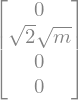

In [29]:
w2=sqrt(2*m)*Matrix([[0],[1],[0],[0]]);w2

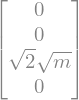

In [30]:
w3=sqrt(2*m)*Matrix([[0],[0],[1],[0]]);w3

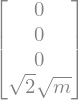

In [31]:
w4=sqrt(2*m)*Matrix([[0],[0],[0],[1]]);w4

$w_1,w_2$ are solutions of positive energy and spins up and down along the z-axis.

In [32]:
w1==hep.u(pe0,1)

True

The antiparticle helicity spinor $v(p,-1)$ corresponds to an negative energy solution with spin up along the $z$ axis in the rest system. Vice versa for $v(p,1)$.

In [33]:
w3==hep.v(pe0,-1)

True

The spin assignment can be checked by equations like the following one:

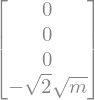

In [34]:
S3*w4

The operator
$-\gamma_5\!\! \not\!s$ (where $s$ is the spin four vector) handles the helicity assignments properly. In the rest system we have $s^\mu=(0,0,0,1)$ with $s^2=-1$.  The helicity operator $H_3$ in the z direction of the rest system is therefore (skipping the factor $1/2$):

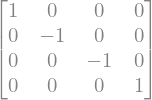

In [35]:
H3=-hep.g5*hep.g3;H3

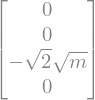

In [36]:
H3*hep.v(pe0,-1)

$\gamma_5\!\! \not\!s$  is written invariantly and consequently is also the proper helicity operator in the Lab.
A Lorentz boost along he $z$-axis transforms the momentum fourvector of the restsystem to $(E,0,0,p)$ and the spin vector to $(p/m,0,0,E/m)$ with $p$ an abbreviation for $\sqrt{E^2-m^2}$. Forgetting again the the factor 1/2 for convenience we get

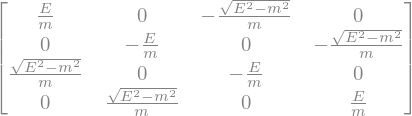

In [37]:
H3=hep.g5*hep.g0*sqrt(E**2-m**2)/m-hep.g5*hep.g3*E/m;H3

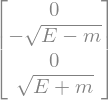

In [38]:
test=simplify(H3.subs(sqrt(E**2-m**2),sqrt(E-m)*sqrt(E+m))*hep.v(pez,1));test

where we have helped a little bit by hand.

In [39]:
test==hep.v(pez,1)

True

The textbooks usually quote the helicity projection operator
$\Sigma=(1+\gamma_5\!\! \not\!s)/2$. 

Another projection operator is $(1\pm\gamma_5)/2$ which selects  states with positive or negative chirality, i.e. eigenstates of $\gamma_5$ withe eigenvalues $\pm 1$. 

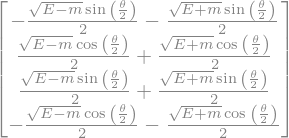

In [40]:
hep.projm*hep.u(pe,-1)

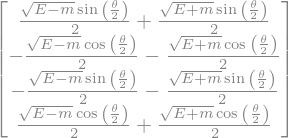

In [41]:
hep.g5*hep.projm*hep.u(pe,-1)

For massless fermions the chirality eigenstates are given by the heicity states. 

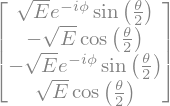

In [42]:
test=hep.g5*hep.u(pexyz,-1).subs(m,0);test

In [43]:
test==hep.g5*hep.u(pexyz,-1).subs(m,0)

True

$\gamma_5$ generically transforms a particle with negative helicity  into an antiparticle with positive helicity and vice versa:

In [44]:
hep.g5*hep.u(pexyz,-1)==hep.v(pexyz,1)

True

## 3) C,P,T

Charge conjugation  $C$ transforms a particle with given helicity into an antiparticle with the same helicity,
$\psi\to\psi_C={\mathrm i}\gamma^2\psi^*$. Here as example $v(p,1)=\imath\gamma2 u^*(p,1)$. Not knowing how to force sympy tu assume $E-m >0$ I do the complex conjugate by hand.

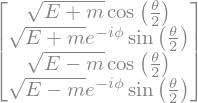

In [45]:
ustar=hep.u(pexyz,1).subs(phi,-phi);ustar 

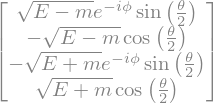

In [46]:
uC=I*hep.g2*ustar;uC

In [47]:
hep.v(pexyz,1)==uC

True

We could define a charge conjugation operator $C=\imath \gamma_2$ acting on $\psi^*$. In the literature this symbol is reserved to $C=\imath \gamma_2\gamma_0$ acting on $\bar{\psi}^T$ ($T$ means "transpose"), therefore $\psi_C=C\bar{\psi}^T$. Of course both definitions are equivalent.

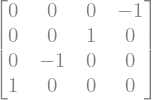

In [48]:
C=I*hep.g2*hep.g0;C

In [49]:
uC==C*hep.ubar(pexyz,1).T

True

Now $\bar{\psi}_C=-\imath\bar{\psi}^*\gamma_2=\psi^TC$

In [50]:
ubarstar=hep.ubar(pexyz,1).subs(phi,-phi);ubarstar

In [51]:
hep.vbar(pexyz,1)==-ubarstar*I*hep.g2

True

In [52]:
hep.vbar(pexyz,1)==transpose(hep.u(pexyz,1))*C

True

In the $x,z$-plane the spinors are real. Therefore charge conjugation  simplifies a lot.

In [53]:
I*hep.g2*hep.u(pe,1)==hep.v(pe,1)

True

that is $u(p_e,1)_C=v(p_e,1)$. 

The parity operation $P$ transforms $\vec{p}\rightarrow -\vec{p}$ and 
$\lambda\rightarrow-\lambda$. For spinors  $\psi\to\psi_P =P\psi$ with $P=\gamma^0$ holds.

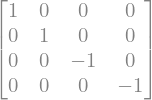

In [54]:
P=hep.g0;P

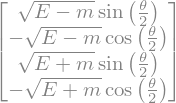

In [55]:
P*hep.v(pe,1)

In [56]:
hep.v(peneg,-1)==P*hep.v(pe,1)

True

that is $Pv(E,\vec{p},1)=v(E,-\vec{p},-1)$. 

Time reversal $T$ transforms $\vec{p}\rightarrow -\vec{p}$ leaving $\lambda$ unchanged. In applying $T$ to spinors one has to consider the antiunitarian character of the time reversal operator. Ths means that $T=-\gamma^1\gamma^3$ has to be applied to the complex conjugate spinors (see Bjorken Drell), $\psi\to\psi_T =T\psi^*$.

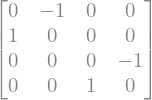

In [57]:
T=-hep.g1*hep.g3;T

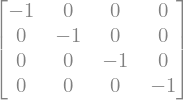

In [58]:
T*T

In the xz plane complex conjugation is not relevant and thus:

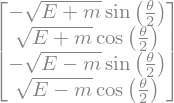

In [59]:
T*hep.u(pe,1)

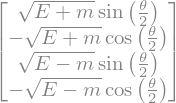

In [60]:
hep.u(peneg,1)

In [61]:
T*hep.u(pe,1)==-hep.u(peneg,1)

True

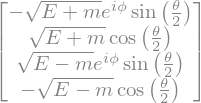

In [62]:
hep.u(pexyz,-1).subs(phi,-phi)

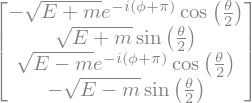

In [63]:
hep.u(pexyz,-1).subs(theta,pi-theta).subs(phi,pi+phi)

Combining the 3 transformation-matrices yields $TPC=\gamma_5$

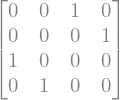

In [64]:
cpt=T*P*I*hep.g2;cpt

In [65]:
cpt==hep.g5

True

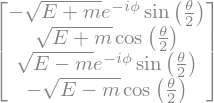

In [66]:
test=cpt*hep.v(pexyz,1);test

In [67]:
test==hep.u(pexyz,-1)

True

Applying $TPC$ to complex spinors is easy because the complex conjugation in the rules for $C$ and $T$ cancel
each other. If you still have doubts, do it step by step: 

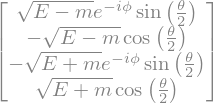

In [68]:
step1=I*hep.g2*ustar;step1

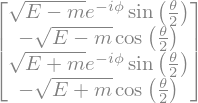

In [69]:
step2=P*step1;step2

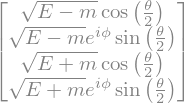

In [70]:
step2star=step2.subs(phi,-phi)
step3=T*step2star;step3

In [71]:
step3==hep.v(pexyz,-1)

True

The $S$ matrix is $CPT$ invariant ($CPT$ theorem). Therefore scattering amplitudes involving helicity spinors  are invariant with respect to replacing particles by antiparticles with reversed helicities.

## 4) Weyl representation

The popular Weyl representation is reached by the unitary transformation

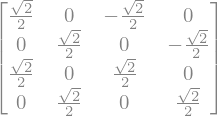

In [72]:
U=(hep.one+hep.g5*hep.g0)/sqrt(2);U

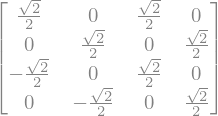

In [73]:
Uinv=U.inv();Uinv

Basically $\gamma_5$ and $\gamma^0$ are interchanged

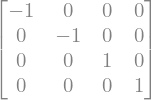

In [74]:
g5W=U*hep.g5*Uinv;g5W

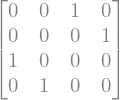

In [75]:
g0W=U*hep.g0*Uinv;g0W

In [76]:
g1W=U*hep.g1*Uinv

In [77]:
g2W=U*hep.g2*Uinv

In [78]:
g3W=U*hep.g3*Uinv

A typical Weyl spinor looks complicated at first sight

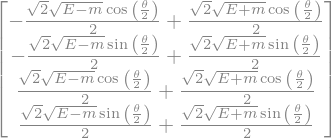

In [79]:
uW=U*hep.u(pe,1);uW

but with the help of e.g.

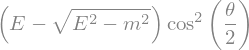

In [80]:
simplify(uW[0]**2)

we obtain simple expressions for the 4 Weyl helicity spinors

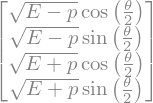

In [81]:
uWR=Matrix([[sqrt(E-p)*cos(theta/2)],[sqrt(E-p)*sin(theta/2)],
             [sqrt(E+p)*cos(theta/2)],[sqrt(E+p)*sin(theta/2)]]);uWR

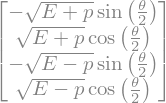

In [82]:
uWL=Matrix([[-sqrt(E+p)*sin(theta/2)],[sqrt(E+p)*cos(theta/2)],
             [-sqrt(E-p)*sin(theta/2)],[sqrt(E-p)*cos(theta/2)]]);uWL

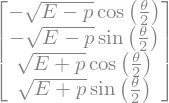

In [83]:
vWL=Matrix([[-sqrt(E-p)*cos(theta/2)],[-sqrt(E-p)*sin(theta/2)],
             [sqrt(E+p)*cos(theta/2)],[sqrt(E+p)*sin(theta/2)]]);vWL

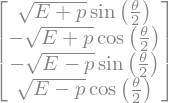

In [84]:
vWR=Matrix([[sqrt(E+p)*sin(theta/2)],[-sqrt(E+p)*cos(theta/2)],
             [-sqrt(E-p)*sin(theta/2)],[sqrt(E-p)*cos(theta/2)]]);vWR

The Weyl representation is particularly attractive for massless particles, because the spinors are reduced
to 2 components only, the Dirac equation is replaced by 2 Weyl equations

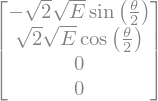

In [85]:
uWL.subs(p,E)

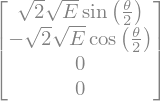

In [86]:
vWR.subs(p,E)

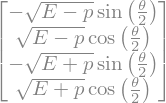

In [87]:
-g1W*g3W*uWR

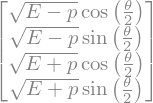

In [88]:
uWR

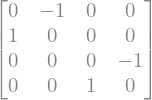

In [89]:
-g1W*g3W

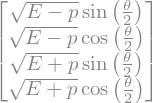

In [90]:
uWR.subs(theta,pi-theta)